## CIRCLE DATA SCIENCE 

In [449]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from math import sqrt
import sklearn
from scipy.stats import skew
import featuretools as ft
from sklearn.metrics import mean_squared_error
from math import sqrt

## 1. Load Dataset

In [365]:
# importing dataset

beer_data = pd.read_csv(r'.\beer_reviews_2.csv')

In [366]:
# seeing the top elemets in the dataset

beer_data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


## 2. Exploratory Data Analysis

In [367]:
# Finding the shape of the data to get a feel of the number of rows and columns in it

print('Number of rows = ', beer_data.shape[0] , '\nNumber of columns = ', beer_data.shape[1])

Number of rows =  1586614 
Number of columns =  13


In [368]:
# using columns to find the list of all the columns in the dataset

print(beer_data.columns.tolist())

['brewery_id', 'brewery_name', 'review_time', 'review_overall', 'review_aroma', 'review_appearance', 'review_profilename', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_abv', 'beer_beerid']


In [369]:
# information on the datatype and the number of not null values in the dataset

beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


- The dataset has both numerical(int64/float64) and categorical features as shown in the table above

In [370]:
# null values in each column

beer_data.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

- The dataset has a few null columns : review_profilename, beer_abv, brewery_name             
- Beer_abv accounts for the maximum number of null values in the column

In [371]:
# changing the review column to appropriate date time format

beer_data['review_time'] = pd.to_datetime(beer_data['review_time'],unit='s')
print('The trend were measured in the year : ',  beer_data['review_time'].dt.year.unique(), 'across various months',beer_data['review_time'].dt.month.unique(),'\n')

The trend were measured in the year :  [2009 2010 2012 2011 2002 2004 2003 2001 2008 2007 2006 2005 2000 1999
 1998 1996] across various months [ 2  3 12  1 10  5 11  9  8  6  7  4] 



In [372]:
# Visualizing the data for review_overall average score across the years

beer_data['review_time']  = beer_data['review_time'].dt.year

AxesSubplot(0.125,0.125;0.775x0.755)


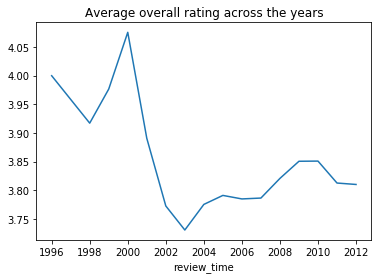

In [373]:
print(beer_data.groupby('review_time')['review_overall'].mean().plot(kind = 'line',title = 'Average overall rating across the years'))

The number of reviews for each year  AxesSubplot(0.125,0.125;0.775x0.755)


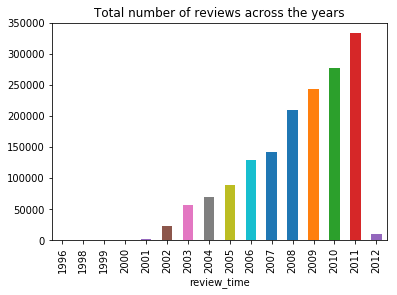

In [374]:
print('The number of reviews for each year ', beer_data.groupby('review_time')['review_overall'].count().plot(kind = 'bar',title = 'Total number of reviews across the years'))

As seen in the above 2 plots, we can deduce:

- When the beer review dataset was taken initially in 1996, there were not a significant number of reviewers. But with time the number of reviewers have increased over the years.
- As the number of reviewers increased there was a steep decrease in the average overall rating. This can be seen clearly with the data in 2002, 2003 and so on.
- With time the average rating of a beer has increased by a very small amount ( from 2003 - 2010)


In [375]:
print('unique reviewers : '  , len(beer_data['review_profilename'].unique()) )
print('unique beers : '  , len(beer_data['beer_name'].unique() ))
print('unique breweries : ' , len(beer_data['brewery_id'].unique() ))
print('unique beer styles : ', len(beer_data['beer_style'].unique()))
print('Users with most reviews : ', beer_data[ 'review_profilename' ].value_counts().head().index.tolist())

unique reviewers :  33388
unique beers :  56857
unique breweries :  5840
unique beer styles :  104
Users with most reviews :  ['northyorksammy', 'BuckeyeNation', 'mikesgroove', 'Thorpe429', 'womencantsail']


In [376]:
# using describe and box plot to check for outliers

beer_data.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,2.008282e+03,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,2.426175e+00,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,1.996000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,2.007000e+03,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,2.009000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,2.010000e+03,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,2.012000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


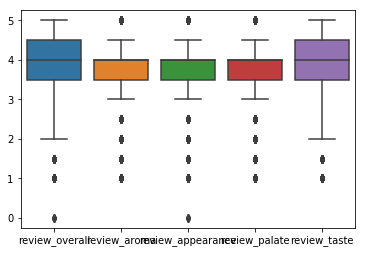

In [377]:
box_plot = sns.boxplot(data = beer_data,order = ['review_overall','review_aroma','review_appearance','review_palate','review_taste'])

- As the box plot above shows that most of the features have a median value of 4 with some outliers above and below

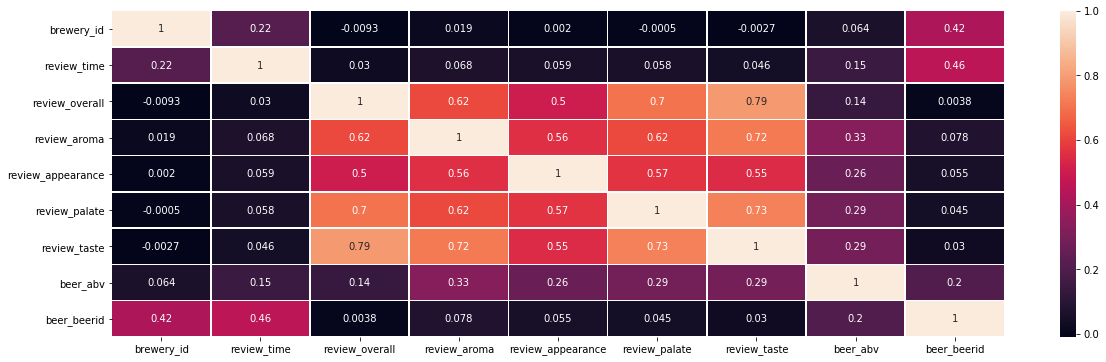

In [378]:
# finding the correlation between the fetures

corr = beer_data.corr()
fig, ax = plt.subplots(figsize=(20,6)) 
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5, ax = ax)
plt.show()

- As shown in the figure above some of the values ar highly correlated positievely, which means if the value of one the feature increase the other also moves in the same direction:
    - review_taste and review_overall
    - review palate and review_overall

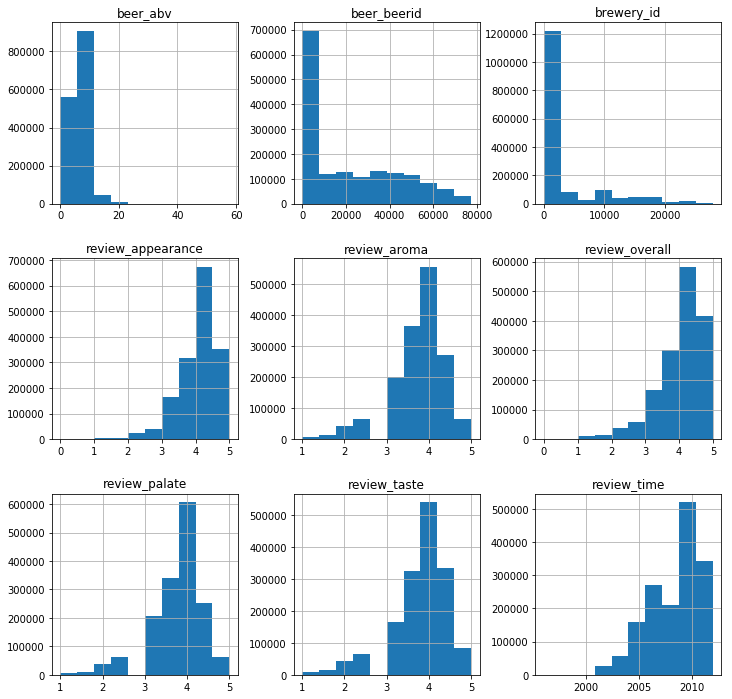

In [379]:
# Analyzing the numerical features

beer_data.hist(figsize=(12,12))
plt.show()

- As seen in the above plots, we see that some of the features follow a distribution close to normal distribution. eg. review_palate, review_taste
- Some of the features are highly negetievely skewed.eg. review_overall, review_aroma,review_appearance

## 3. Preprocessing and Feature Engineering

In [380]:
clean_beer_data = beer_data.copy()

#### Handle missing values - handling the number of null values for 'beer_abv'

In [381]:
clean_beer_data.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [382]:
# I am using a method to replace the beer_abv value with the median value of same beer 'beer_abv' present in other rows

clean_beer_data['beer_abv'] = clean_beer_data.groupby(['beer_name'])['beer_abv'].transform(lambda x: x.fillna(x.median()))

In [383]:
# now checking the number of missing values in 'beer_abv'

print('Now the missing number of values in each column : \n', clean_beer_data.isnull().sum())

# I am finding the percenatge of missing values:
print('Now the missing number( as percentage) in each column : \n', clean_beer_data.isnull().sum() * 100 / len(clean_beer_data))

# since the % of value missing are less than 3.5%, then I will remove the rows with the null values as the size of the dataset is quite large
clean_beer_data.dropna(inplace=True)


Now the missing number of values in each column : 
 brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              55774
beer_beerid               0
dtype: int64
Now the missing number( as percentage) in each column : 
 brewery_id            0.000000
brewery_name          0.000945
review_time           0.000000
review_overall        0.000000
review_aroma          0.000000
review_appearance     0.000000
review_profilename    0.021934
beer_style            0.000000
review_palate         0.000000
review_taste          0.000000
beer_name             0.000000
beer_abv              3.515285
beer_beerid           0.000000
dtype: float64


#### Removing duplicate values

In [384]:
# checking for the dupliacte values and removing them

clean_beer_data.drop_duplicates(inplace = True)

In [385]:
beer_data_friend = clean_beer_data.copy()

##### Removing unnecessary columns

In [386]:
# removing columns : 'brewery_id','brewery_name','review_profilename','beer_name','beer_beerid','review_time'
# we will be removing these columns as these column donot account to the overall quality of the beer as these are generic fields
# we can see that from the correlation plot, where they account very low to the overall_review

clean_beer_data.drop(columns=['brewery_id','brewery_name','review_profilename','beer_name','beer_beerid','review_time'], inplace = True)

In [387]:
print(' The remaining columns : ' , clean_beer_data.columns)

 The remaining columns :  Index(['review_overall', 'review_aroma', 'review_appearance', 'beer_style',
       'review_palate', 'review_taste', 'beer_abv'],
      dtype='object')


#### One hot encoding the categorical features

In [388]:
#  creating a new column to showcase the multiple beer style associated with a beer

col_add = clean_beer_data["beer_style"].str.split("/", n = 1, expand = True)

In [389]:
clean_beer_data['beer_style_1'] = col_add[0]

In [390]:
clean_beer_data.drop(columns=['beer_style'], inplace = True)

In [391]:
# one hot endoing the feature : 'beer_style_1'

one_hot_beer_style_1= pd.get_dummies(clean_beer_data['beer_style_1'])
clean_beer_data = clean_beer_data.drop(['beer_style_1'],axis = 1)
clean_beer_data = clean_beer_data.join(one_hot_beer_style_1)


In [392]:
clean_beer_data.head(2)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,Altbier,American Adjunct Lager,American Amber,American Barleywine,...,Scotch Ale,Scottish Ale,Scottish Gruit,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
0,1.5,2.0,2.5,1.5,1.5,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,3.0,3.0,3.0,6.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####  Feature Tools for feature engineering

In [335]:
beer_data_feature_tools = beer_data.copy()
beer_data_feature_tools.drop(columns = ['brewery_id','brewery_name','review_time','beer_style','review_profilename'], inplace =True)

# creating an entity set 'es'

decisions=beer_data_feature_tools.pop('review_overall')
es = ft.EntitySet(id = 'review_data')

# adding a dataframe

es.entity_from_dataframe(entity_id = 'review_data', dataframe = beer_data_feature_tools, index = 'index')

es.normalize_entity(base_entity_id='review_data', new_entity_id='beer_class', index = 'beer_name',
additional_variables = ['beer_beerid'])

2019-09-20 05:01:37,656 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column


Entityset: review_data
  Entities:
    review_data [Rows: 1586614, Columns: 7]
    beer_class [Rows: 56857, Columns: 2]
  Relationships:
    review_data.beer_name -> beer_class.beer_name

In [336]:
feature_matrix, feature_names = ft.dfs(entityset=es,target_entity = 'review_data',max_depth = 2,verbose = 1,n_jobs = 3)

Built 38 features
EntitySet scattered to workers in 5.730 seconds
Elapsed: 00:52 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


tornado.application - ERROR - Exception in Future <Future cancelled> after timeout
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 970, in error_callback
    future.result()
concurrent.futures._base.CancelledError


In [337]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 38 columns):
review_aroma                                      1586614 non-null float64
review_appearance                                 1586614 non-null float64
review_palate                                     1586614 non-null float64
review_taste                                      1586614 non-null float64
beer_name                                         1586614 non-null object
beer_abv                                          1518829 non-null float64
beer_class.beer_beerid                            1586614 non-null int64
beer_class.SUM(review_data.review_aroma)          1586614 non-null float64
beer_class.SUM(review_data.review_appearance)     1586614 non-null float64
beer_class.SUM(review_data.review_palate)         1586614 non-null float64
beer_class.SUM(review_data.review_taste)          1586614 non-null float64
beer_class.SUM(review_data.beer_abv)              1586614 non-nul

The above columns are produced by Feature Tools

## 4. Wierdest beers?
- As per the definition of wierd, it means something offbeat or bizarre. 
- So, in my assumption the wierdest beers could be the ones which have:


         Higher ==> 'review_aroma','review_appearance','review_taste','review_palate' 
                                BUT
                      Lower ==> 'review_overall'

P.S. I am not so much into beer :P

- To find the Lowest and highest values of the above mentioned features ==> I will use the approach of box plot to locate the median values and the below average values across all beers

Text(0.5, 1.0, 'Review across all beers')

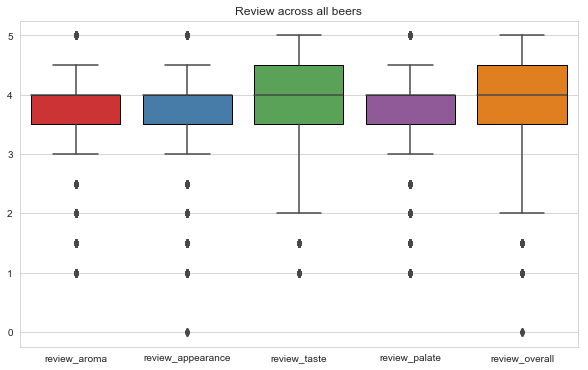

In [31]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(data = beer_data,order = ['review_aroma','review_appearance','review_taste','review_palate','review_overall'])
plt.setp(ax.artists, alpha=1, linewidth=1, edgecolor="k")
plt.title('Review across all beers')

In [498]:
#  have used the above box plot to decide the values of the features on which I will apply the filter to get the weird beer

beer_data_wierd = beer_data[(beer_data['review_taste'] >= 4) & (beer_data['review_palate'] >= 4) & (beer_data['review_appearance'] >= 4) & (beer_data['review_aroma'] >= 4) & (beer_data['review_overall'] <  3)]['beer_name'].value_counts()

In [499]:
beer_data_wierd_top_5 = beer_data_wierd[:5]

In [502]:
beer_data_wierd_top_5.index

Index(['120 Minute IPA', 'World Wide Stout',
       'Creme Brulee (Imperial Milk Stout)', 'Bourbon County Brand Stout',
       'Samuel Adams Triple Bock'],
      dtype='object')

## 5. Recommending beers to a friend

- Recommending to a friend !! 'Thats Tricky'
- In my approach, I am creating a new column 'review_avg' using the average of 'review_overall','review_appearance'+ 'review_aroma', 'review_palate', 'review_taste'. I am doing this to give every bear a cumulative mean score which can be used later
- Then initially I am removing the beers which have less 2 reviews or lower so that I have have beers with more reviews and reliability.
- Then using a box plot to see the distribution of 2 things : one is to see the total number of reviews for each beer and second is to check the meadian value of reviews for each beer. I am doing this so that I put a condition to take out beers with number of reviews more than the median or which are falling in the quartile Q3
- Then I will sort the list in descending oders with beers with the highest median rating value on top and recommend the top 5 beers to my friend

In [503]:
group_less_review = beer_data_friend.groupby('review_profilename')
len(group_less_review.filter(lambda x: x['beer_beerid'].count() <2 ))

10291

There are a lot of people who have written 1 reviews, so I was thinking of removing the reviews.
But a better option could be to remove the beer which have 1 reviews as more the number of reviews, the better the chances 
of beer being good 


In [504]:
# no lets take an average of the ratings of the values in different columns to get a cumulative score.
# I have taken this approach to have a single column giving each beer a total score out of 5

beer_data_friend['review_avg'] = (beer_data_friend['review_overall'] + beer_data_friend['review_appearance'] + beer_data_friend['review_aroma'] + beer_data_friend['review_palate'] + beer_data_friend['review_taste'])/5

In [505]:
beer_data_friend.head(2)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_avg
0,10325,Vecchio Birraio,2009,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,1.8
1,10325,Vecchio Birraio,2009,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2.9


In [506]:
# removing the column and creating a new dataset with fewer column so to reduce reducndancy of data

columns = ['beer_beerid', 'beer_name', 'review_avg']
beer_data_recommend = beer_data_friend[columns]
beer_data_recommend.head()

,beer_beerid,beer_name,review_avg
0,47986,Sausa Weizen,1.8
1,48213,Red Moon,2.9
2,48215,Black Horse Black Beer,2.9
3,47969,Sausa Pils,3.0
4,64883,Cauldron DIPA,4.2


In [507]:
# here I wanted to remove all the beers which have less reviews:

beer_reviews_all = beer_data_recommend.groupby('beer_beerid').agg({'review_avg': [np.size, np.mean]})
beer_reviews_all.head()

review_avg          
                  size      mean
beer_beerid                     
5                423.0  3.381797
6                877.0  3.643558
7                659.0  3.181032
8                 68.0  3.311765
9                116.0  3.090517

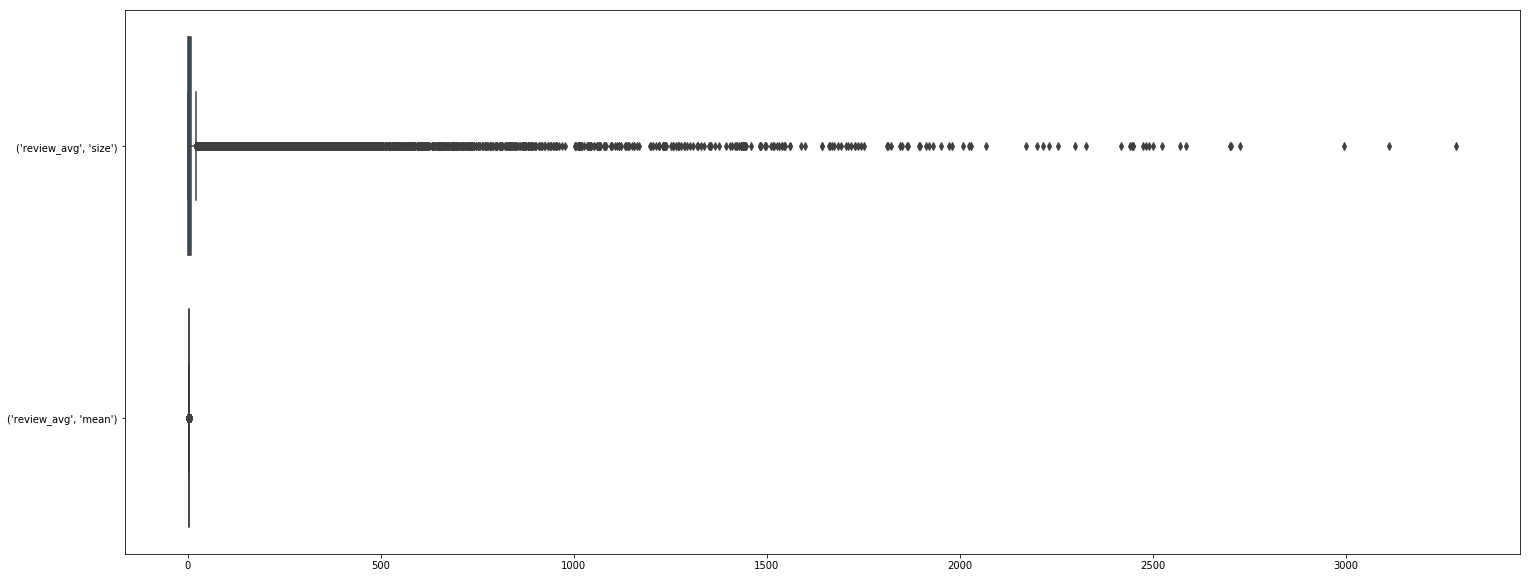

In [508]:
plt.figure(figsize = (25,10))
ax = sns.boxplot(data = beer_reviews_all, orient = 'h')

In [509]:
# now taking only those beer values where number of reviews > 1000, to suggest my friend the best of the best

more_reviews_beer = beer_data_recommend.beer_beerid.value_counts()
more_reviews_beer_list  = more_reviews_beer[more_reviews_beer > 1000].index.tolist()

In [510]:
beer_data_recommend = beer_data_recommend[beer_data_recommend['beer_beerid'].isin(more_reviews_beer_list)]

In [511]:
friend_recoomendation = beer_data_recommend[['beer_name','review_avg']].pivot_table(index="beer_name", aggfunc=("count",'mean','median')).sort_values(('review_avg','median'),ascending=[False])

In [514]:
friend_recoomendation[:3]

review_avg                 
                              count      mean median
beer_name                                           
Trappist Westvleteren 12       1272  4.601415    4.7
The Abyss                      1410  4.517305    4.6
Pliny The Elder                2522  4.534417    4.6

In [515]:
print(' I would recommend the below beer to my friends : ' , friend_recoomendation[:5].index.values)

 I would recommend the below beer to my friends :  ['Trappist Westvleteren 12' 'The Abyss' 'Pliny The Elder'
 'Founders KBS (Kentucky Breakfast Stout)' 'Dark Lord Imperial Stout']


## 6. Models


- I started to look into problem in terms of classification initially as the number of labels were fixed from 0 to 5 with .5 interval
- Then I have analyzed it as a regression problem as I wanted to see how the performace of the model changes and whether my assumption of making it a classification problems works
- I have higlihted my findings at the end 

#### Results below for the time I treated it as a classification problem

In [96]:
beer_data_friend_1 = beer_data_friend.copy()
beer_data_friend_1.drop(columns=['brewery_id','brewery_name','beer_style','review_profilename','beer_name','review_avg','beer_beerid','review_time'], inplace = True)

In [397]:
clean_beer_data_classification = clean_beer_data.copy()

In [399]:
clean_beer_data_classification['review_overall'] = clean_beer_data_classification['review_overall'].astype(str)

In [400]:
# i am using the test, train split as 99% to 1%, as the number of datarows are huge and I want my model to perform better
# so, i will train it on alot of data and test it on a on fewer set of data

X = clean_beer_data_classification.loc[:,'review_aroma':]
Y = clean_beer_data_classification.loc[:, 'review_overall']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .01,stratify = clean_beer_data_classification['review_overall'])

In [401]:
# craeted a function 'model' for the train and test of the various models which I pass

def model_classification(model, X_train, X_test, y_train, y_test):
    sc = StandardScaler() 
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    return [train_accuracy,test_accuracy,y_pred,y_train_pred]                 

##### Model 1 : Random Forest Classifier

In [402]:
random_forest_model = RandomForestClassifier()
random_forest_model_results = model_classification(random_forest_model,X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [403]:
print('train_accuracy : ', random_forest_model_results[0])
print('test_accuracy : ', random_forest_model_results[1])

train_accuracy :  0.6575544042271708
test_accuracy :  0.4767008692242337
Time taken for the model to run: 1 minute 32 seconds


In [404]:
print(confusion_matrix(y_test,random_forest_model_results[2]))
print("\n")
print(classification_report(y_test,random_forest_model_results[2]))

[[  46   16   25   11    3    1    0    0    1]
 [  26   34   35   13    9    3    1    1    0]
 [  14   34  128   78   68   25   13    0    1]
 [   6    9  101  146  182   68   36    2    3]
 [   3    7   47  136  618  487  252   20    5]
 [   1    0   17   53  389 1164 1131  128   12]
 [   3    1   12   24  202  826 3582  909   80]
 [   0    0    4    5   24  136 1489 1306  196]
 [   0    2    2    1    7   12  202  397  270]]


              precision    recall  f1-score   support

         1.0       0.46      0.45      0.46       103
         1.5       0.33      0.28      0.30       122
         2.0       0.35      0.35      0.35       361
         2.5       0.31      0.26      0.29       553
         3.0       0.41      0.39      0.40      1575
         3.5       0.43      0.40      0.41      2895
         4.0       0.53      0.64      0.58      5639
         4.5       0.47      0.41      0.44      3160
         5.0       0.48      0.30      0.37       893

   micro avg       0.48

#####  Model 2 : Logistic Regression 

In [405]:
Logistic_regression_model = LogisticRegression(solver='lbfgs')
Logistic_regression_model_results  = model_classification(Logistic_regression_model,X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [406]:
print('train_accuracy : ', Logistic_regression_model_results[0])
print('test_accuracy : ', Logistic_regression_model_results[1])

train_accuracy :  0.41867026852886113
test_accuracy :  0.4153323312201817
Time taken for the model to run: 2 minute 1 seconds


In [407]:
print(confusion_matrix(y_test,Logistic_regression_model_results[2]))
print("\n")
print(classification_report(y_test,Logistic_regression_model_results[2]))

[[  14    0   24    0   59    2    3    1    0]
 [   3    0   15    0   91   10    3    0    0]
 [   2    0   11    0  234   91   23    0    0]
 [   0    0    4    0  208  226  114    1    0]
 [   0    0    5    0  135  540  891    4    0]
 [   0    0    0    0   46  220 2617   12    0]
 [   0    0    0    0   31   77 5322  204    5]
 [   0    0    0    0    5   10 2498  640    7]
 [   0    0    0    0    3    1  374  502   13]]




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.74      0.14      0.23       103
         1.5       0.00      0.00      0.00       122
         2.0       0.19      0.03      0.05       361
         2.5       0.00      0.00      0.00       553
         3.0       0.17      0.09      0.11      1575
         3.5       0.19      0.08      0.11      2895
         4.0       0.45      0.94      0.61      5639
         4.5       0.47      0.20      0.28      3160
         5.0       0.52      0.01      0.03       893

   micro avg       0.42      0.42      0.42     15301
   macro avg       0.30      0.17      0.16     15301
weighted avg       0.35      0.42      0.32     15301



In [446]:
# Comparison for both the models and feature importance

print ('5 top features of Decision Tree : ')
for importance, name in sorted(zip(random_forest_model.feature_importances_, X.columns),reverse=True)[:5]:
    print(name,importance * 100)

feature_importance  = Logistic_regression_model.coef_[0]
sorted_idx = np.argsort(feature_importance)
print('\n\n5 top features of Logsitic Regression : ', np.array(X.columns)[sorted_idx][:5])


5 top features of Decision Tree : 
review_taste 75.98552458714313
beer_abv 6.758201998148705
review_palate 4.5909206903389945
review_appearance 2.8295064697837025
review_aroma 2.4234809914595905


5 top features of Logsitic Regression :  ['review_appearance' 'beer_abv' 'Light Lager' 'American Adjunct Lager'
 'review_taste']


As seen above, the problem when treated as a classification problem was showing a very low accuracy. This could be due to the fact the model is not learning well as many of the values are near to the boundary, which could have adverse affect on the underlying model

#### Results below for the time I treated it as a Regression problem

In [426]:
clean_beer_data_regression = clean_beer_data.copy()
clean_beer_data_regression = shuffle(clean_beer_data_regression)

In [427]:
X = clean_beer_data_regression.loc[:,'review_aroma':]
Y = clean_beer_data_regression.loc[:, 'review_overall']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .01)

In [429]:
# made a generic function for the fit and predict function

def model_regression (model, X_train, X_test, y_train, y_test):
    sc = StandardScaler() 
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    return [y_pred,y_train_pred] 

##### Model 1 : Linear Regreesion model

In [430]:


Linear_Regression_model = LinearRegression()
Linear_Regression_model = model_regression(Linear_Regression_model,X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys


In [431]:
train_rms = sqrt(mean_squared_error(y_train, Linear_Regression_model[1]))
test_rms = sqrt(mean_squared_error(y_test, Linear_Regression_model[0]))
print('train_rms',train_rms*100)
print('test_rms',test_rms*100)

train_rms 40.82847663861494
test_rms 41.13448271539642


##### Model 2 : Random Forest Regressor Model

In [432]:
random_forest_model = RandomForestRegressor()
random_forest_model_results=model_regression(random_forest_model,X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [455]:
train_rms = sqrt(mean_squared_error(y_train, random_forest_model_results[1]))
test_rms = sqrt(mean_squared_error(y_test, random_forest_model_results[0]))
print('train_rms',train_rms*100)
print('test_rms',test_rms*100)


train_rms 33.59702602925726
test_rms 39.96374584909206


In [456]:
# Comparison for both the models and feature importance

print ('5 top features of Decision Tree : ')
for importance, name in sorted(zip(random_forest_model.feature_importances_, X.columns),reverse=True)[:5]:
    print(name,importance * 100)

5 top features of Decision Tree : 
review_taste 75.98552458714313
beer_abv 6.758201998148705
review_palate 4.5909206903389945
review_appearance 2.8295064697837025
review_aroma 2.4234809914595905


There are a few things that I am taking into consideration and some of my observations:
1. As shown in the table below, when treating this problem into a classification problem, the results were not good. This could be for the reason that there are many data points near the category boundaries

2. Then I took this problem as a regression problem and analyzed the results and results were better than the classification models

3. The model that I have created are a simple model with the base parameter (Could have done hyperparameter tuning if time was more)

4. I have used the perfomance of the model using two criteria : 
    - Regression : One of the error metrice for regression(RMSE) and other is the time taken by the model to train and test. I have considered RMSE as it can be converted to a % value to represent the error
    - Classification : One of the error metrice are Accuracy, F1 and other is the time taken by the model to train and test

<h4>MODELS EXPLAINED :  When I considered it as a classification problem</h4>

<table>
  <tr>
    <th>Model</th>
    <th>Train - Accuracy</th>
    <th>Test - Accuracy</th>
    <th>Test - F1 Score</th>
    <th>Time for train</th>
    <th>Time for test</th>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.6575544042271708</td>
    <td>0.4767008692242337</td>
      <td>0.47</td>
     <td>~101 seconds</td>
      <td>~5 seconds</td>
  </tr>
     <tr>
    <td>Logistic Regression</td>
    <td>0.41867026852886113</td>
    <td>0.4153323312201817</td>
         <td>0.32</td>
    <td>~109 seconds</td>
     <td>~5 seconds</td>
  </tr>
  
</table>

<h4>MODELS EXPLAINED :  When I considered it as a Regression problem</h4>

<table>
  <tr>
    <th>Model</th>
    <th>Train - RMSE (% error)</th>
    <th>Test - RMSE (% error)</th>
    <th>Time for train</th>
    <th>Time for test</th>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>33.59702602925726</td>
    <td>39.96374584909206</td>
     <td>~94 seconds</td>
      <td> ~7 seconds</td>
  </tr>
     <tr>
    <td>Linear Regression</td>
    <td>40.82847663861494</td>
    <td>41.13448271539642</td>
    <td>~83seconds</td>
     <td>~5 seconds</td>
  </tr>
  
</table>

Based on the above results which takes into account the RMSE and time taken to compute, I would recommend The Random Forest Regressor Model as the model % error is less and the time taken to compute is close to the linear regression model

The feature importance/relevance of features that the model highlighted are:
- review_taste 75.98552458714313
- beer_abv 6.758201998148705
- review_palate 4.5909206903389945
- review_appearance 2.8295064697837025
- review_aroma 2.4234809914595905


## 7. Overview and recommendation to the senior management:

1. The Dataset had a total of : 1586614 beers

2. The numbers of unique beers present in the datset were :  56857 

3. There were a lot of parameters on which the review of the beers were given. The parameters were :  ['brewery_id', 'brewery_name', 'review_time', 'review_overall', 'review_aroma', 'review_appearance', 'review_profilename', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_abv', 'beer_beerid'] 

4. The trend were measure in the years :  [2009 2010 2012 2011 2002 2004 2003 2001 2008 2007 2006 2005 2000 1999
 1998 1996] 

5. As the primary focus was to consider a beer with best overall review, let me show how the different parameters are affecting the overall score


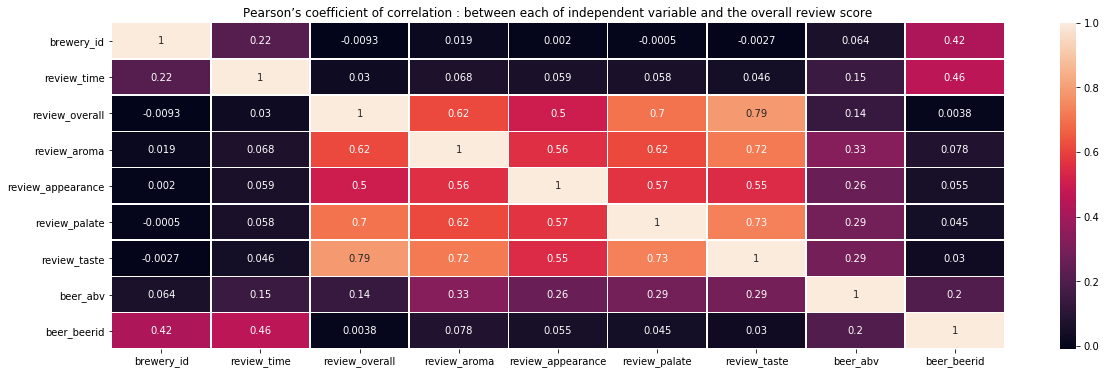

 - Each of these attributes has a positive relationship with the overall score

 - The review_taste and review_palate are having a higher correlation score which suggests that they are contributing more to the overall score than review_appearance and review_aroma

 - Taste has the highest Pearson’s coefficient of correlation value of r = 0.79 with the overall score

 - The reviewers care less about beer smell and appereance of the beer and are focused more on the taste and alcohol content. I also agree with the following hypothesis as it is a very commmon obseravtion that I have also had



In [465]:
print('1. The Dataset had a total of :', len(beer_data),'beers\n')
print('2. The numbers of unique beers present in the datset were : ', len(beer_data['beer_name'].unique()),'\n')
print('3. There were a lot of parameters on which the review of the beers were given. The parameters were : ', beer_data.columns.tolist(),'\n')
print('4. The trend were measure in the years : ',  beer_data['review_time'].unique(),'\n')

print('5. As the primary focus was to consider a beer with best overall review, let me show how the different parameters are affecting the overall score') 
corr = beer_data.corr()
fig, ax = plt.subplots(figsize=(20,6)) 
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5, ax = ax)
plt.title('Pearson’s coefficient of correlation : between each of independent variable and the overall review score')
plt.show()

print(' - Each of these attributes has a positive relationship with the overall score\n')
print(' - The review_taste and review_palate are having a higher correlation score which suggests that they are contributing more to the overall score than review_appearance and review_aroma\n')
print(' - Taste has the highest Pearson’s coefficient of correlation value of r = 0.79 with the overall score\n')
print(' - The reviewers care less about beer smell and appereance of the beer and are focused more on the taste and alcohol content. I also agree with the following hypothesis as it is a very commmon obseravtion that I have also had\n')